# HAPPY CUSTOMERS

## CONTEXT

- The client is a fast growing startup firm in the logistics and delivery space, working with several partners and make on-demand delivery to their clients.
- They are facing various operational challenges and they are working towards addressing them and improving their business throughput.
- Now, they want to gauge how "Happy" or "Satisfied" their customers through a predictive mechanim, and take neccessary actions accordingly.
- For this, they have taken feedback from a customer cohort, based on 6 survey questions, compiled them in a dataset and provided a subset of it for the analytics.
- Based on the provided data description, there are some defined project goals that need to be achieved, and help the client scale up their business operations.     

## DATA DESCRIPTION

- Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
- X1 = my order was delivered on time
- X2 = contents of my order was as I expected
- X3 = I ordered everything I wanted to order
- X4 = I paid a good price for my order
- X5 = I am satisfied with my courier
- X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

## PROJECT GOALS

- Using the provided, predict whether a given customer is **Happy or not (YES/NO)** based on different ratings, from 1 to 5, given by the customers as feedback.
- Achieve an accuracy of **>= 73%** in predicting customer happiness and determine the **minimal set of relevant features** that effectively contribute in predicting it. 
- Based on the predictive analysis performed, provide the neccessary **business recommendations** to the company that can help in **improving customer satisfaction**. 

In [1]:
# import data analysis libraries  
import numpy as np
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

print("installed all dependencies...")

installed all dependencies...


## METHODOLOGY

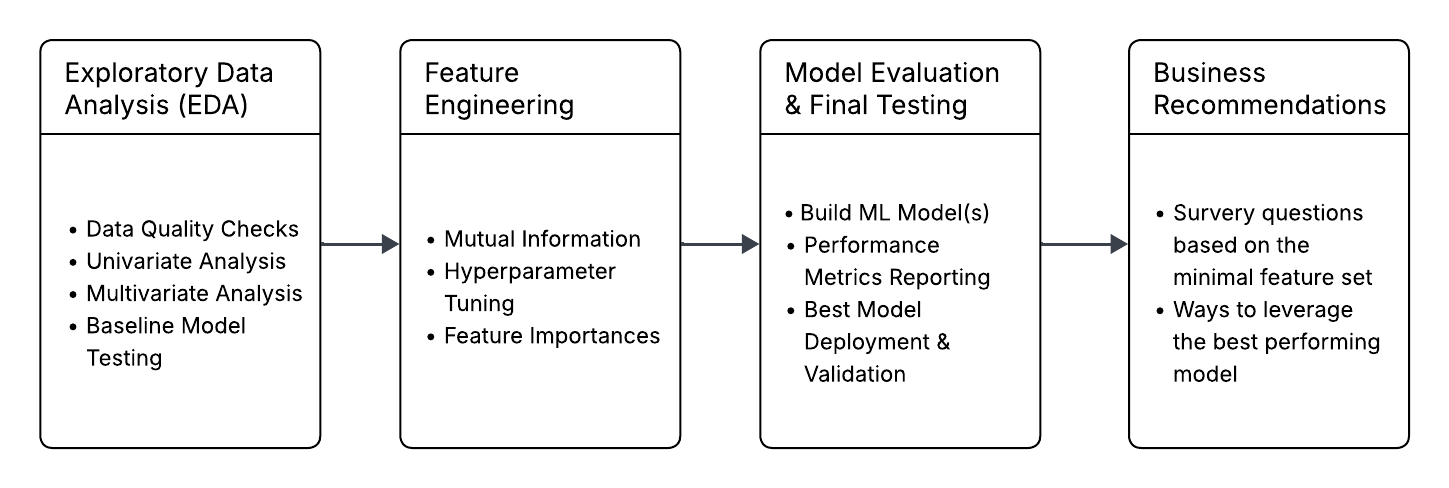

## EXPLORATORY DATA ANALYSIS

### DATA QUALITY CHECKS

In [2]:
#Load the Dataset and view the first few records
data = pd.read_csv('ACME-HappinessSurvey2020.csv')
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
data.columns.tolist() # view the columns

['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']

In [4]:
data.shape # view the dimensions - rows X columns

(126, 7)

In [5]:
data.isna().sum() # check for NULL values in each column/field

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [6]:
data.duplicated().sum() # check for duplicate records

16

In [7]:
data.describe().T # summarize the statistical measures by field 

,count,mean,std,min,25%,50%,75%,max
Y,126.0,0.547619,0.499714,0.0,0.0,1.0,1.0,1.0
X1,126.0,4.333333,0.800000,1.0,4.0,5.0,5.0,5.0
X2,126.0,2.531746,1.114892,1.0,2.0,3.0,3.0,5.0
X3,126.0,3.309524,1.023440,1.0,3.0,3.0,4.0,5.0
X4,126.0,3.746032,0.875776,1.0,3.0,4.0,4.0,5.0
X5,126.0,3.650794,1.147641,1.0,3.0,4.0,4.0,5.0
X6,126.0,4.253968,0.809311,1.0,4.0,4.0,5.0,5.0


#### OBSEVATION(S)
- The dataset comprises of *126 rows X 7 columns* - as mentioned in the data description.
- There are *no NULL values* in any columns - no imputation required.
- There are *16 duplicate records* - but since the dataset is not indexed by an ID/timestamp, *a duplicated record is a valid entry*.
- The dataset is *entirely categorical* in nature - the target Y is binary and the features X1..X6 are categorically ranked 1 to 5.

### UNIVARIATE ANALYSIS

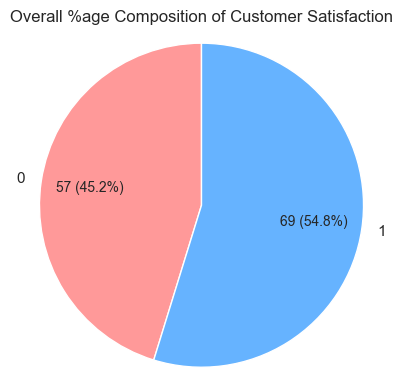

In [8]:
# create a dataframe having the counts of 0's and 1's in the target class and compute their percentage out of total observations
counts_df = data['Y'].value_counts().to_frame(name='Count').reset_index()
counts_df['Percentage'] = round((counts_df['Count']/data.shape[0]) * 100.0,2)
counts_df = counts_df.sort_values('Y')

# create the labels and sizes for the pie chart
labels = counts_df['Y'].astype(str).tolist()
sizes = counts_df['Count'].tolist()
percentages = counts_df['Percentage'].tolist()

# Manually format label as "count (percentage)"
autopct_labels = [f"{c} ({p:.1f}%)" for c, p in zip(sizes, percentages)]

# Pie chart
plt.figure(figsize=(4, 4))
wedges, texts = plt.pie(
    sizes,
    labels=labels,
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 11}
)

# Add manually formatted labels
for i, wedge in enumerate(wedges):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.7 * np.cos(np.deg2rad(angle))
    y = 0.7 * np.sin(np.deg2rad(angle))
    plt.text(x, y, autopct_labels[i], ha='center', va='center', fontsize=10)

plt.title("Overall %age Composition of Customer Satisfaction")
plt.axis('equal')
plt.tight_layout()
plt.show()

#### OBSERVATION(S)

- The dataset is somewhat fairly balanced between unhappy and happy customers in a 45%-55% distribution respectively.
- So, the likelihood of any kind of inherent statistical is not a major concern.

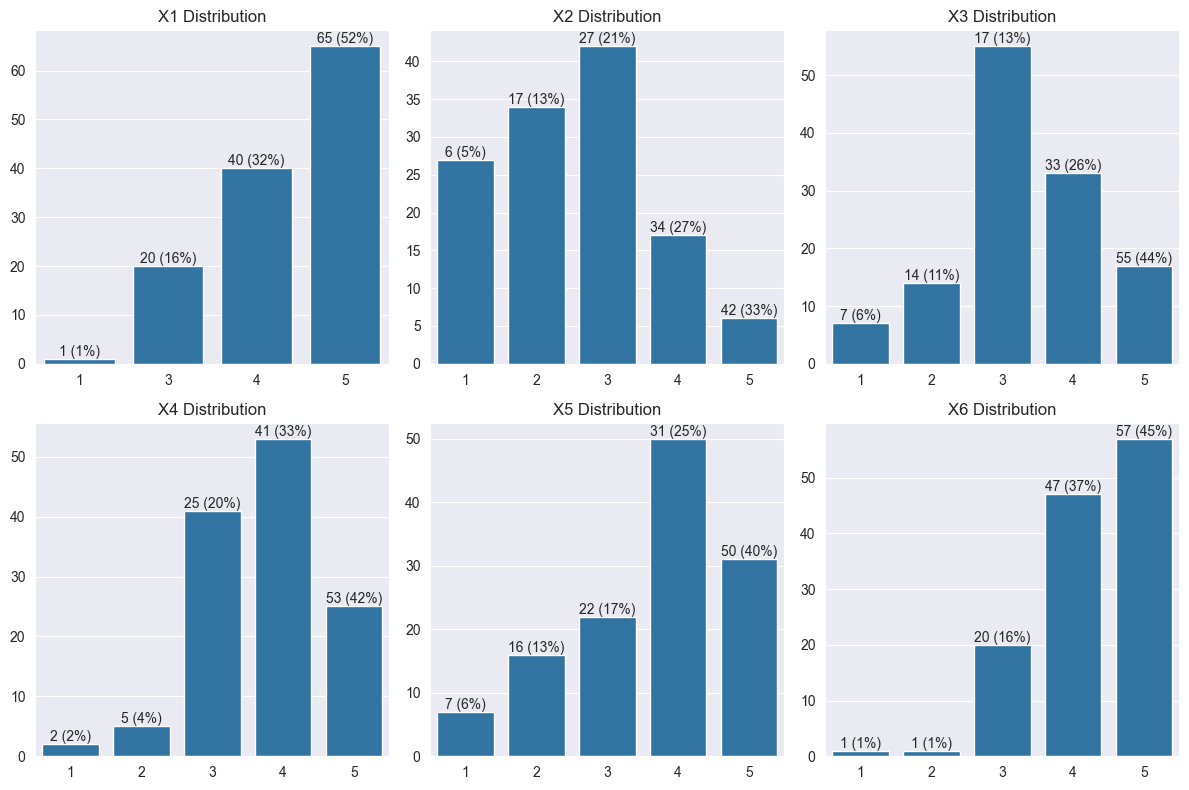

In [9]:
'''
plot_count_with_labels() : function to compute and plot the frequency distribution of each feature
@params : ax - the plot's axis object, data - the pandas dataframe containing the dataset, column - the column/feature
@return - None
'''
def plot_count_with_labels(ax, data, column):
    sns.countplot(data=data, x=column, ax=ax)

    # Get count and percentage
    absolute_counts = data[column].value_counts(ascending=True)
    percent_values = data[column].value_counts(ascending=True, normalize=True).values * 100
    labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(absolute_counts, percent_values)]

    # Add labels
    ax.bar_label(container=ax.containers[0], labels=labels)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f"{column} Distribution")

columns = ['X1','X2','X3','X4','X5', 'X6']

# Create subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

# Plot each column
for ax, col in zip(axes, columns):
    plot_count_with_labels(ax, data, col)


plt.tight_layout()
plt.show()

#### OBSERVATION(S)

- Features X1 and X6 exhibit and incremental trends towards higher rating - meaning increasing customers give a higher rating.
- Features X4 and X5 exhibit the incremental trend till rating=4, but there is marked drop in rating=5.
- Features X2 and X3 ambiguously display incremental and decremental trends in their ratings by the customers.

A more detailed insight is required into the frequency distribution to better understand the customer behavior within each feature.  

### MULTIVARIATE ANALYSIS

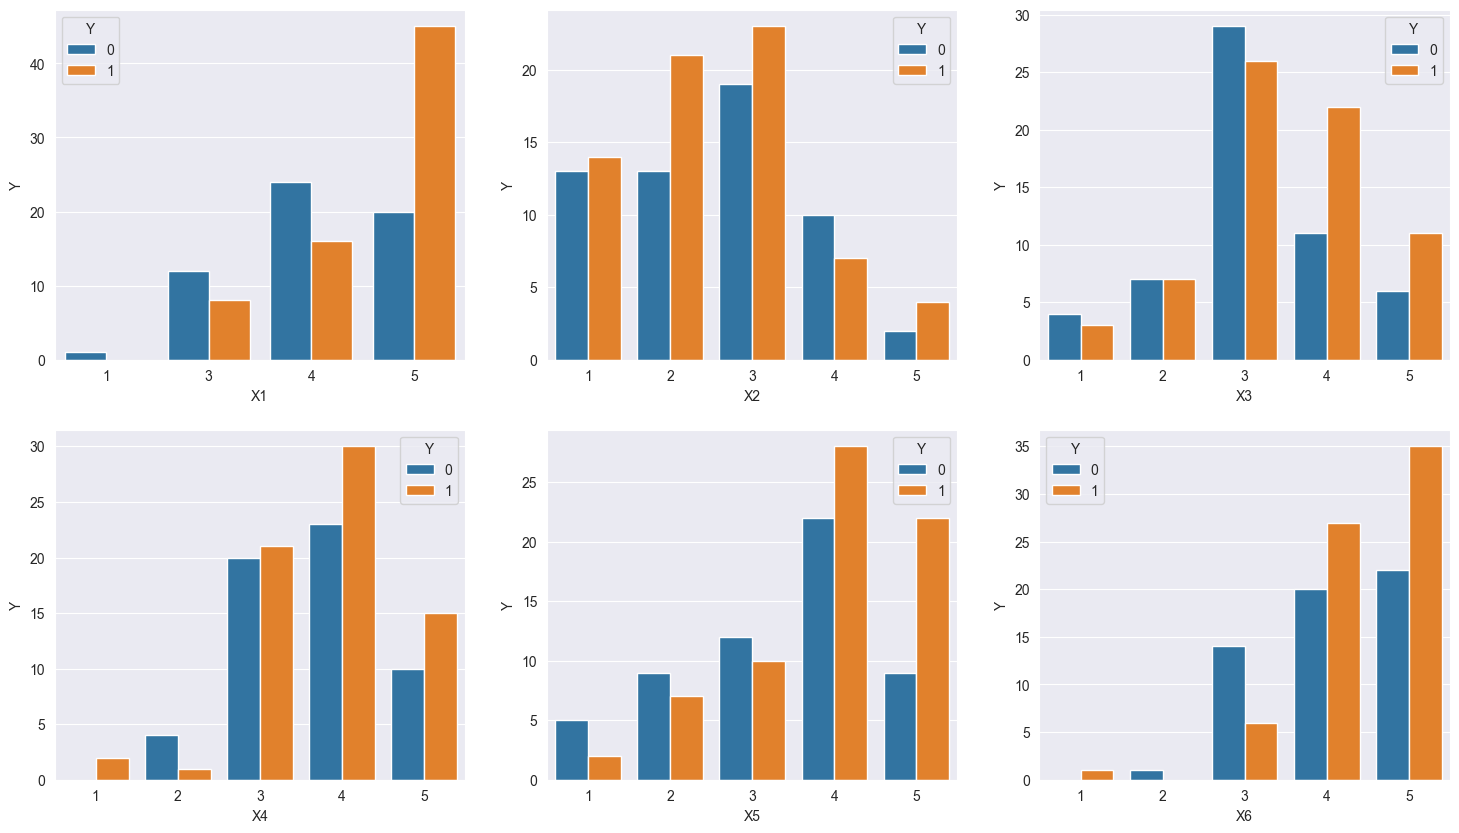

In [10]:
'''
aggregate_data_counts() : function to aggregate the dataframe and get the frequency by each feature and by each rating
@params : df - the input dataframe, x - a feature from X1..X6, y - the happiness/target variable
@return : the aggregated dataframe containing the count of happy/unhappy customers by each feature  
'''

def aggregate_data_counts(df, x, y):
    df_agg = df.groupby([x,y]).size().reset_index().rename(columns={0:'Count'})
    return df_agg

# define the plot axis 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# iterate over each feature and display the plots 
for i, feature in enumerate(columns):
    df_plot = aggregate_data_counts(data, feature, 'Y')
    
    sns.barplot(data=df_plot, x=feature, y='Count', hue='Y', ax=axes[i])
    #axes[i].set_title(f'Satisfaction vs {feature}')
    axes[i].legend(title='Y')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Y')

<Axes: >

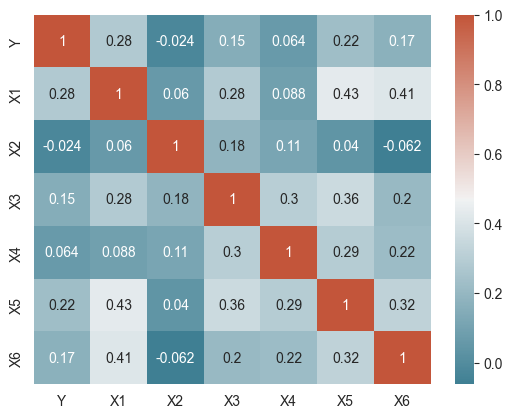

In [11]:
# Create a heatmap to get the correlation of each feature to the target
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

#### OBSERVATION(S)

- The features exhibit a congruent incremental/decremental when drilled down by the customer happiness target variable.
- Based on the correlation matrix - X1, X5 and X6 display a stronger correlation whereas X2, X3 and X4 have a weaker correlation to customer happiness.
- The underlying intuition based on univariate and multivariate analysis suggests retaining X1 and X6, cautiously using X4 and X5 and discarding X2 and X3. 
- However, only a stronger correlation to the target and an explicity incremental does not neccessarily imply the feature has higher predictive power.
- Further feature engineering maybe needed to validate the behavior and predictive power of each feature, and build the minimal feature set accorrdingly. 

### BASELINE MODEL TESTING

Test a few baseline, untuned classifiers with all the features to get an initial idea of what the accuracy measure is like for the dataset. 

In [12]:
# import the neccessary machine learning libraries 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

features = ['X1','X2','X3','X4','X5','X6'] # include all features
X = data[features]  
y = data['Y']

# define some non-linear model, currently untuned, that are capable of classification
models = {
    'Random Forest': RandomForestClassifier(random_state=0),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
}

# define a K-fold cross validator object -> since the dataset is cross-validation is important rather than a general train-test split
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# iterate over each model and compute the accuracy 
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.3f}")

Random Forest Accuracy: 0.588
Decision Tree Accuracy: 0.476
XGBoost Accuracy: 0.572
Logistic Regression Accuracy: 0.557
LightGBM Accuracy: 0.636


#### OBSERVATION(S)

- It can be observed that none of the untuned models have an accuracy of 73% or greater on the initial dataset.
- All the models need to be finetuned, hyperparameters be determined, duly train-test splitted and be stratified with k-folds to maintain class balance.  

## FEATURE ENGINEERING 

In [13]:
'''
Run an initial baseline test on the training set with k-fold cross-validation to observe any improvement in the model performance 
'''
# Create training, test dataset in the ratio 90-10 -> 90-train and 10-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

# cross-validate each model on the training set
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.3f}")

Random Forest Accuracy: 0.532
Decision Tree Accuracy: 0.487
XGBoost Accuracy: 0.533
Logistic Regression Accuracy: 0.460
LightGBM Accuracy: 0.619


#### OBSERVATION(S)

- There is barely an improvement in the model performance even after stratification on the training data.
- So, the hyperparameter tuning is now imperative as baseline models do not pass the performance expectations.
- The tuned models will be used in feature engineering to determine the feature importances which is to validate the findings of the EDA.   

### MUTUAL INFORMATION B/W FEATURE(S) AND TARGET

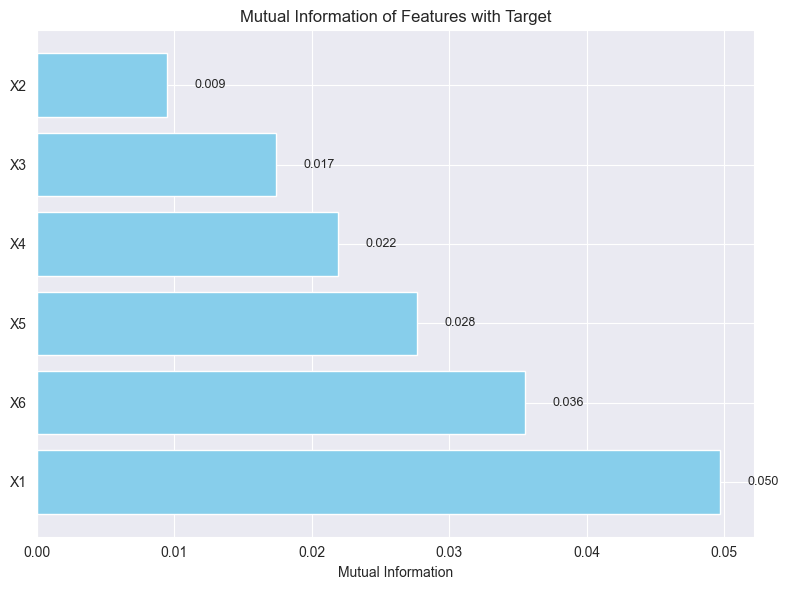

In [15]:
# Compute mutual information
from sklearn.feature_selection import mutual_info_classif
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
X = data[features]
y = data['Y']

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=0)

# Create DataFrame for results
mi_df = pd.DataFrame({
    'Feature': features,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)


plt.figure(figsize=(8, 6))
ax = plt.barh(mi_df['Feature'], mi_df['MI Score'], color='skyblue')
plt.xlabel("Mutual Information")
plt.title("Mutual Information of Features with Target")

# Add labels to each bar
for bar in ax:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
             f"{width:.3f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

#### OBSERVATION(S)

- X1 shares the highest mutual information with the target Y, validating it's the most informative feature for predicting customer satisfaction.
- X6 shares moderate MI despite low correlation, but it may be able to some capture nonlinear patterns worth considering.
- X2 has the lowest MI score, indicating minimal predictive value and also has the lowest correlation - not recommended to include it in the feature set.

While the MI gives a slightly clearer idea than the multivariate analysis and correlation matrix, finding out the feature importances will help us finally build the mini feature set for each model. 

### HYPERPARAMETER TUNING

The Grid Search technique will be used to determine the optimate hyperparameters for each of the models.

In [16]:
from sklearn.model_selection import GridSearchCV # import the grid search library

'''
tune_models() : function to find the optimal hyperparameters and applying the tuning to each model accordingly
@params : models - dict holding the current untuned models, X_train - the training data's features , y_train - the training data's target
@return : a <key, value> dict comprising of each model as a <key> and hyperparameters as <value>
'''
def tune_models(models, X_train, y_train):
    tuned_models = {} # init an empty dict
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # defined the cross-validator object or the stratifier 

    # Define hyperparameter grids for each model 
    param_grids = {
        'Random Forest': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, None],
            'min_samples_split': [2, 5],
            'max_features': ['sqrt', 'log2']
        },
        'Decision Tree': {
            'max_depth': [3, 5, None],
            'min_samples_split': [2, 5],
            'criterion': ['gini', 'entropy']
        },
        'XGBoost': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5],
            'learning_rate': [0.01, 0.1],
            'subsample': [0.8, 1.0]
        },
        'LightGBM': {
            'n_estimators': [50, 100],
            'max_depth': [3, 5, -1],
            'learning_rate': [0.01, 0.1],
            'num_leaves': [15, 31]
        },
        'Logistic Regression': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['liblinear']
        }
    }

    # iterate over each untuned model -> tune it and find the respective hyperparameter
    for name, model in models.items():
        print(f"Tuning {name}...")
        param_grid = param_grids.get(name, {})
        grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f"Best accuracy for {name}: {grid_search.best_score_:.3f}")
        print(f"Best params: {grid_search.best_params_}\n")
        tuned_models[name] = grid_search.best_estimator_

    return tuned_models

# call the function on the training data
tuned_models = tune_models(models, X_train, y_train)
tuned_models

Tuning Random Forest...
Best accuracy for Random Forest: 0.557
Best params: {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}

Tuning Decision Tree...
Best accuracy for Decision Tree: 0.533
Best params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}

Tuning XGBoost...
Best accuracy for XGBoost: 0.584
Best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}

Tuning Logistic Regression...
Best accuracy for Logistic Regression: 0.557
Best params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

Tuning LightGBM...
Best accuracy for LightGBM: 0.584
Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 15}



{'Random Forest': RandomForestClassifier(max_depth=3, min_samples_split=5, random_state=0),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', min_samples_split=5, random_state=0),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, ...),
 'Logisti

### FEATURE IMPORTANCES

Used the fine tuned models with their optimal hyperparameter to find the importance of each feature, respective to the model.

In [17]:
'''
get_feature_importances() : function to find the importance of the features for each fine tuned model 
@params : tuned_models - dict holding the tuned models, feature_names - an array holding all the features from X1..X6
@return : importances_dict - a dict holding a list of dataframes as <values>, that has the importances of each feature for a given model
'''

def get_feature_importances(tuned_models, feature_names):
    importances_dict = {} # init an empty dict

    for name, model in tuned_models.items():
        print(f"\n{name} Feature Importance:")

        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_[0])
        else:
            print(" No feature importance method available.")
            continue

        # Create dataFrame for clarity
        df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False).reset_index(drop=True)

        print(df)
        importances_dict[name] = df

    return importances_dict

# call the function 
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']  
importances_by_model = get_feature_importances(tuned_models, features)



Random Forest Feature Importance:
  Feature  Importance
0      X1    0.218203
1      X5    0.198119
2      X3    0.169581
3      X4    0.165159
4      X6    0.130700
5      X2    0.118238

Decision Tree Feature Importance:
  Feature  Importance
0      X5    0.212249
1      X3    0.207785
2      X4    0.202433
3      X1    0.177094
4      X6    0.132447
5      X2    0.067994

XGBoost Feature Importance:
  Feature  Importance
0      X1    0.286739
1      X3    0.262098
2      X6    0.149046
3      X5    0.138266
4      X2    0.103171
5      X4    0.060680

Logistic Regression Feature Importance:
  Feature  Importance
0      X1    0.437033
1      X5    0.189690
2      X3    0.145130
3      X2    0.067446
4      X4    0.026815
5      X6    0.005232

LightGBM Feature Importance:
  Feature  Importance
0      X1          50
1      X3          50
2      X4          25
3      X5          25
4      X2           0
5      X6           0


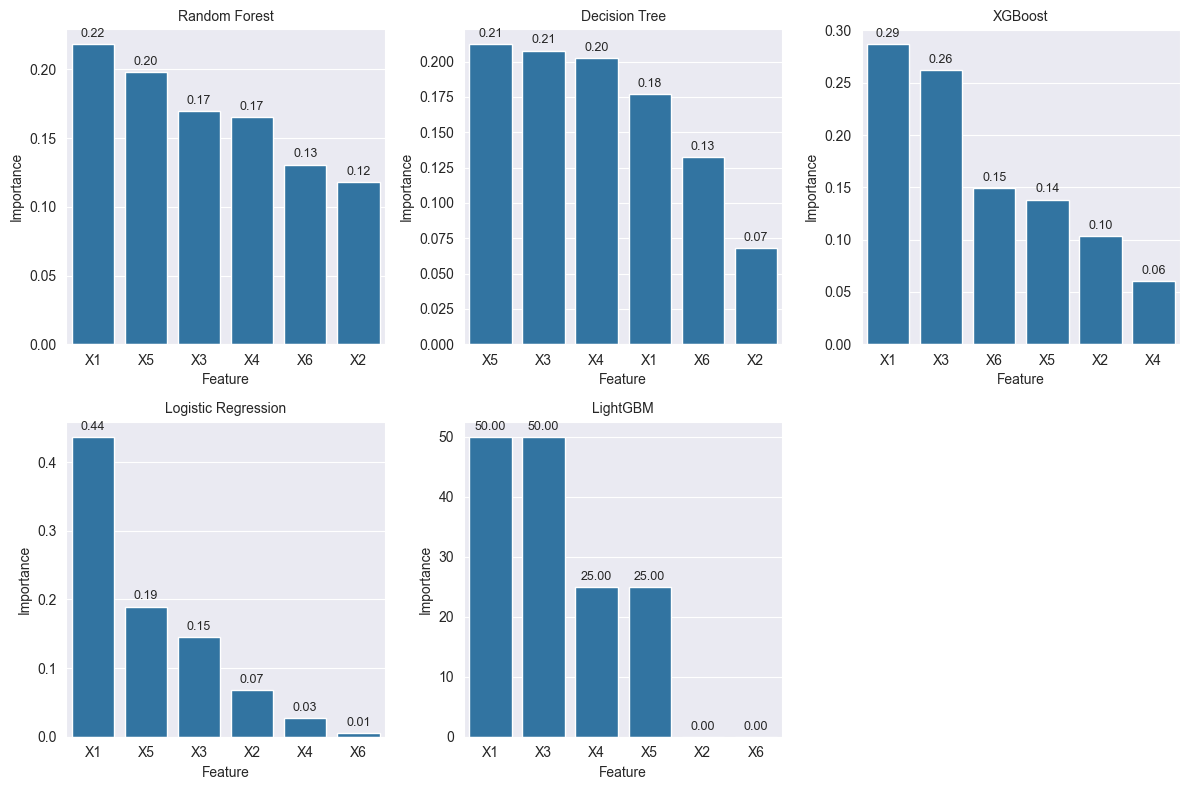

In [18]:
'''
plot_feature_importances() : function to generate the plot for the Feature v/s Importance by model 
@params : importances_by_model - a dictionary of dataframe containing feature importances of each model computed by get_feature_importances()
@return : None
'''
def plot_feature_importances(importances_by_model):
    import matplotlib.pyplot as plt
    import seaborn as sns

    num_models = len(importances_by_model)
    
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.flatten()

    for i, (model_name, df) in enumerate(importances_by_model.items()):
        ax = axes[i]
        sns.barplot(data=df, x='Feature', y='Importance', ax=ax)
        ax.set_title(f'{model_name}', fontsize=10)
        ax.set_xlabel('Feature')
        ax.set_ylabel('Importance')

        # Add labels on bars
        for container in ax.containers:
            ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

    #Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



plot_feature_importances(importances_by_model)

#### OBSERVATION(S)

Based on the feature importance measures of each model posting finetuning, following are the optimal feature sets for each model: 

| Model | Optimal Features | 
| --- | --- | 
| Random Forest | ['X1', 'X5', 'X3', 'X4'] | 
| Decision Tree | ['X5', 'X3', 'X4', 'X1'] |
| XGBoost | ['X1', 'X3', 'X6', 'X5'] |
| Logistic Regression | ['X1', 'X5', 'X3'] |
| LightGBM | ['X1', 'X3', 'X4', 'X5'] |

**EXPLANATION** 

Consider Random Forest: 
- X1 and X5 contribute 22% and 20% towards the target respectively - the two highest - definitely include them in the feature set.
- X3 and X4 contribute both 17% each towards the target - they are equally important - include them as well.
- X2 and X6 contribute 13% and 12% towards the target respectively - while decent, they are lower than other features - no need to include them.

## MODEL EVALUATION & FINAL TESTING

### MACHINE LEARNING PIPELINE

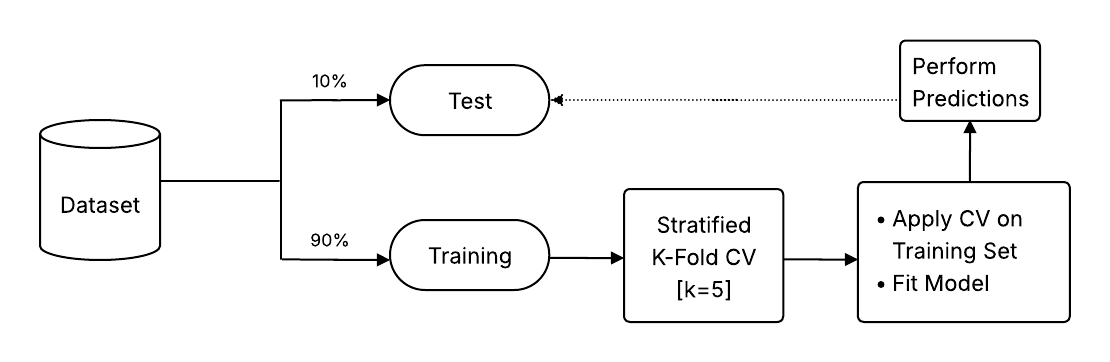

### PERFORMANCE METRICS REPORTING

In [19]:
# import libraries to compute performance metrics and reports 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# define the minimal feature set for each model
features_by_model = {
    'Random Forest': ['X1', 'X5', 'X3', 'X4'],
    'Decision Tree': ['X5', 'X3', 'X4', 'X1'],
    'XGBoost': ['X1', 'X3', 'X6', 'X5'],
    'Logistic Regression': ['X1', 'X5', 'X3'],
    'LightGBM': ['X1', 'X3', 'X4', 'X5']
}

'''
compile_classification_report() : function to evaluate each model and generates/print the classification report  
@params : models - dict of tuned models, features_dict - dict with each model's optimal features, 
        X_train - the feature set in the training data  
        y_train - the target class in the training data 
        X_test - the feature set in the test data 
        y_test - the feature set in the test data
        cv - the cross-validator object or stratifier 
@return : df_out - a dataframe containing the accuracy measures from the classification report for the training and test data
'''

def compile_classification_report(models, features_dict, X_train, y_train, X_test, y_test, cv):
    res = [] # init an output array 

    for name, model in models.items():
        features = features_dict[name]
        # update X_train and X_test based on the optimal feature sets 
        X_tr = X_train[features] 
        X_te = X_test[features]

        # Fit the model 
        model.fit(X_tr, y_train)

        # compute the accuracy using the stratifier 
        cv_scores = cross_val_score(model, X_tr, y_train, cv=cv, scoring='accuracy')

        # perform predictions on both training and test data 
        y_train_pred = model.predict(X_tr)
        y_test_pred = model.predict(X_te)

        # compute the accuracy scores - to be appended to the output array  
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        # print the classification reports for eaxch model 
        print(f"\n{name} Classification Report (Training Set):")
        print(classification_report(y_train, y_train_pred, digits=3))
        
        print(f"\n{name} Classification Report (Test Set):")
        print(classification_report(y_test, y_test_pred, digits=3))

        print('----------------------------------------------------------------')

        # append the model accuracies for each model to the output array 
        res.append({
            'Model': name,
            'Train Accuracy': round(train_acc, 3),
            'Test Accuracy': round(test_acc, 3)
        })

    # create a dataframe, append the output array and return it 
    df_out = pd.DataFrame(res)
    df_out = df_out.sort_values(by=['Test Accuracy'], ascending=False)

    return df_out

report_df = compile_classification_report(tuned_models, features_by_model, X_train, y_train, X_test, y_test, cv)


Random Forest Classification Report (Training Set):
              precision    recall  f1-score   support

           0      0.690     0.784     0.734        51
           1      0.800     0.710     0.752        62

    accuracy                          0.743       113
   macro avg      0.745     0.747     0.743       113
weighted avg      0.750     0.743     0.744       113


Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

           0      0.667     0.667     0.667         6
           1      0.714     0.714     0.714         7

    accuracy                          0.692        13
   macro avg      0.690     0.690     0.690        13
weighted avg      0.692     0.692     0.692        13

----------------------------------------------------------------

Decision Tree Classification Report (Training Set):
              precision    recall  f1-score   support

           0      0.734     0.922     0.817        51
           1     

In [20]:
report_df

,Model,Train Accuracy,Test Accuracy
2,XGBoost,0.796,0.846
3,Logistic Regression,0.558,0.769
0,Random Forest,0.743,0.692
4,LightGBM,0.655,0.692
1,Decision Tree,0.814,0.462


#### OBSERVATION(S)

- Based on the classification reports, the fine tuned **XGBoost** model is the best performing model with a 79.6% accuracy on the training set and a 84.6% accuracy on the test set, crossing the benchmark accuracy of expected 73%.
- Logistic Regression performs well on the test dataset, but its performance is low in the training, exhibit inconsistency in the performance.
- Random Forest and Decision Tree are overfitting, with the latter exhibiting severe overfitting, whereas LightBGM is overall underfitting.

### FINAL MODEL DEPLOYMENT & VALIDATION

Validate and deploy the best performing model i.e. XGBoost on the full dataset - compare the actual and predicted values and analyze performance metrics. 

In [21]:
minimal_feature_set = ['X1', 'X3', 'X6', 'X5'] # the optimal feature set for XGBoost 
X_val = data[minimal_feature_set]
y_val = data['Y']

# Refit XGBoost on the entire dataset
best_model = tuned_models['XGBoost'] # fetch the fine tuned XGBoost from the tuned models dict
best_model.fit(X_val, y_val)

# Perform the predictions 
y_pred = best_model.predict(X_val)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_val.values,
    'Predicted': y_pred
})

print("Final XGBoost Classification Report (on full data):")
print(classification_report(y_val, y_pred, digits=3))



Final XGBoost Classification Report (on full data):
              precision    recall  f1-score   support

           0      0.808     0.737     0.771        57
           1      0.797     0.855     0.825        69

    accuracy                          0.802       126
   macro avg      0.802     0.796     0.798       126
weighted avg      0.802     0.802     0.801       126



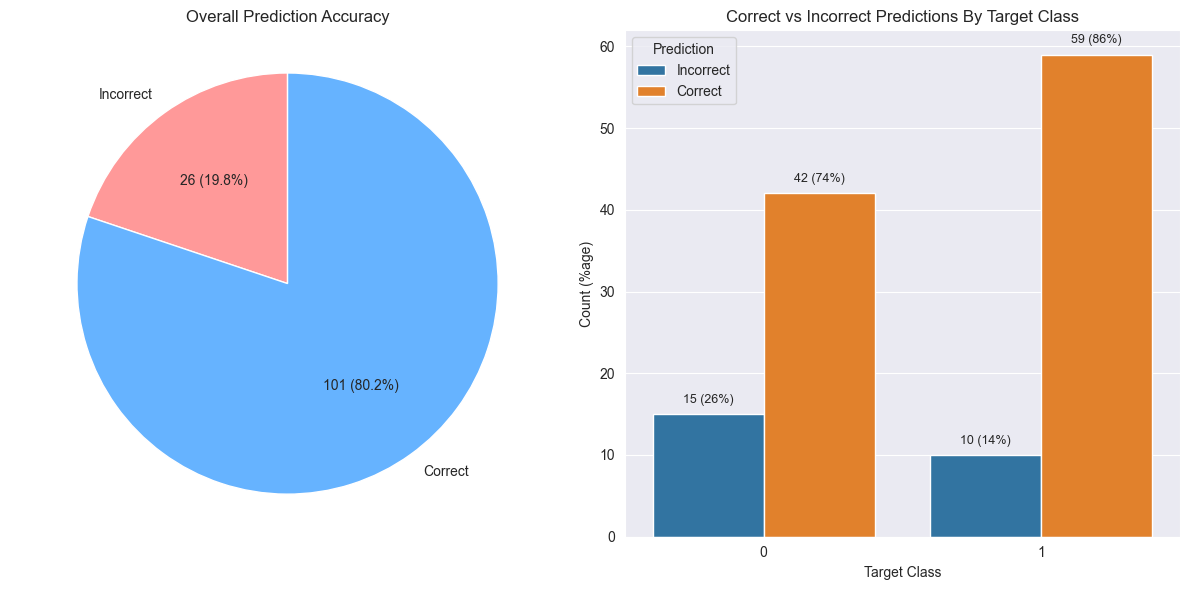

In [22]:
# Prepare data for pie chart
comparison_df['Correct'] = comparison_df['Actual'] == comparison_df['Predicted']
correct_counts = comparison_df['Correct'].value_counts().sort_index()
pie_labels = ['Incorrect', 'Correct']
pie_sizes = correct_counts.values

# Prepare data for bar chart
comparison_df_agg = comparison_df.groupby(['Actual', 'Correct']).size().reset_index(name='Count')
total_per_class = comparison_df_agg.groupby('Actual')['Count'].transform('sum')
comparison_df_agg['Percentage'] = (comparison_df_agg['Count'] / total_per_class * 100).round(2)
comparison_df_agg['Correct'] = comparison_df_agg['Correct'].map({True: 'Correct', False: 'Incorrect'})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(
    pie_sizes,
    labels=pie_labels,
    autopct=lambda p: f"{int(p * sum(pie_sizes) / 100) + 1} ({p:.1f}%)",
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title("Overall Prediction Accuracy")
axes[0].axis('equal')  # circular pie

# Bar plot
ax = sns.barplot(data=comparison_df_agg, x='Actual', y='Count', hue='Correct', dodge=True, ax=axes[1])

# Add count and %age labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            bar_center = bar.get_x() + bar.get_width() / 2
            actual_class = round(bar_center)
            total = comparison_df_agg[comparison_df_agg['Actual'] == actual_class]['Count'].sum()
            percent = height / total * 100
            label = f"{int(height)} ({percent:.0f}%)"
            ax.text(bar_center, height + 1, label, ha='center', va='bottom', fontsize=9)

axes[1].set_title("Correct vs Incorrect Predictions By Target Class")
axes[1].set_xlabel("Target Class")
axes[1].set_ylabel("Count (%age)")
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['0', '1'])
axes[1].legend(title='Prediction')

plt.tight_layout()
plt.show()

#### OBSERVATION(S)

- The overall accuracy of the final tuned XGBoost model is 80.2%, indicating strong generalization on the full dataset.
- The XGBoost model exhibits balanced performance across target classes with precision and recall both above 79%.
- Target Class '1' i.e. happy customers is predicted more reliably with a recall of 85.5% - useful for devising retention and loyalty strategies.
- Target Class '0' i.e. unhappy customers has a slightly lower recall of 73.7% - meaning some unhappy customers may go undetected.
- The model has a high F-1 measure of 77.1% and 82.5% for target class 0 and 1 respectively, indicating a solid balance between precision and recall.

## BUSINESS RECOMMENDATIONS


1. **Refine the survey by removing low-impact questions**
    - Based on the insights of the feature engineering and EDA, the questions X2: *" contents of my order was as I expected"* and X4: *"I paid a good price for my order"* have lower predictability. Hence, these can be safely removed to further streamline the survey.
<br> <br>
2. **Retain and prioritize the high-impact survey questions** <br>
    Following are the strongest predictive indicators of customer satisfaction:
    - X1 : *"my order was delivered on time"* - **Must Include**
    - X3: *"I ordered everything I wanted to order"* **Must Include**
    - X6 : *"the app makes ordering easy for me"* **Recommended to be included**
    - X5: *"I am satisfied with my courier"* **Recommended to be included**
<br> <br>
3. **Leverage the high recall in predicting happy customer to build customer retention strategies**
- The XGBoost model has a recall of 85.5% in predicting happy customers (target class '1'), implying that it reliably detects who is satisfied based on questions X1, X3, X6 and X5.
- This insight can be used to find loyal customers segments and devise strategies to incentivize happy customers ans retain them using loyatly programs, referral benefits, cashback etc. all with a lower risk of misclassification.